In [1]:
import numpy as np
import pandas as pd

In [2]:
url_csv = "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv"
df = pd.read_csv(url_csv)

In [3]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [4]:

df.isna()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,True,False,False,True,False,False
3,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False


In [5]:
type(df.iloc[2, 1])

numpy.float64

In [6]:
type(df.iloc[8, 4])

str

In [7]:
df["NUM_BEDROOMS"]

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [8]:
df["NUM_BEDROOMS"].isna()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [9]:
df["NUM_BEDROOMS"].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [10]:
df["NUM_BEDROOMS"].replace("--", np.nan).replace("na", np.nan)

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: object

In [11]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'list[HashableT] | Callable[[Hashable], bool] | None' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Sequence[str] | Mapping[str, Sequence[str]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbos

In [12]:
missing_values = ["na", "--", "#n/a"]

In [13]:
df = pd.read_csv(url_csv, na_values=missing_values)

In [14]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [15]:
df["OWN_OCCUPIED"]

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [16]:
df["OWN_OCCUPIED"].isna()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [17]:
df["OWN_OCCUPIED"].replace("12", np.nan)

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [18]:
for row in df["OWN_OCCUPIED"]:
    if row not in ["Y", "N", np.nan]:
        index_loc = df["OWN_OCCUPIED"].to_list().index(row)
        print("ganti", row, "di index", index_loc)
        df.iloc[index_loc, 3] = np.nan

ganti 12 di index 3


In [19]:
for i in df["OWN_OCCUPIED"].unique():
    if i not in ["Y", "N", np.nan]:
        df["OWN_OCCUPIED"].replace(i, np.nan, inplace=True)

In [20]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        print("ganti", row, "di index", cnt)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [21]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [22]:
df.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [23]:
df.isna().any()

PID              True
ST_NUM           True
ST_NAME         False
OWN_OCCUPIED     True
NUM_BEDROOMS     True
NUM_BATH         True
SQ_FT            True
dtype: bool

In [24]:
df.isna().values.any()

True

In [25]:
df.isna().any().any()

True

In [26]:
df.isna().sum().sum()

12

### Imputing Missing Values

In [27]:
df["ST_NUM"]

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [28]:
df["ST_NUM"].fillna(25, inplace=True)

In [29]:
df["ST_NUM"]

0    104.0
1    197.0
2     25.0
3    201.0
4    203.0
5    207.0
6     25.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [30]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,25.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,25.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [31]:
median = df["NUM_BEDROOMS"].median()
df["NUM_BEDROOMS"].fillna(median, inplace=True)

In [32]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,25.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,25.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


### Obesity in Englad

In [34]:
%matplotlib inline
url_xlsx = "https://github.com/ardhiraka/PFDS_sources/blob/master/obes.xls?raw=true"
data = pd.ExcelFile(url_xlsx)

In [35]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [36]:
data_age = data.parse(u"7.2", skiprows=4, skipfooter=14)

In [37]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [38]:
data_age.rename(columns={"Unnamed: 0": "Year"}, inplace=True)

In [39]:
data_age.dropna(inplace=True)

In [40]:
data_age.set_index("Year", inplace=True)

In [41]:
data_age.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


<Axes: xlabel='Year'>

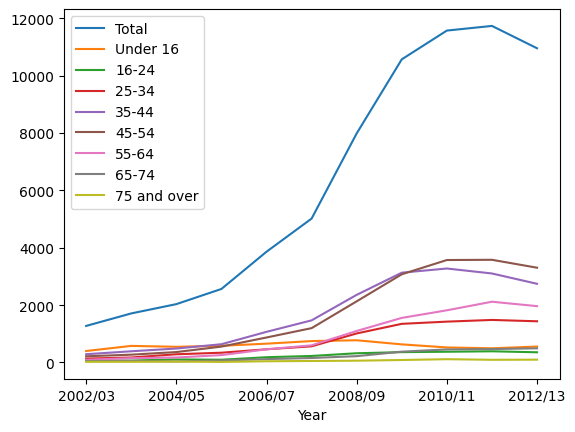

In [42]:
data_age.plot()

In [43]:
data_age_minus_total = data_age.drop("Total", axis=1)

<Axes: xlabel='Year'>

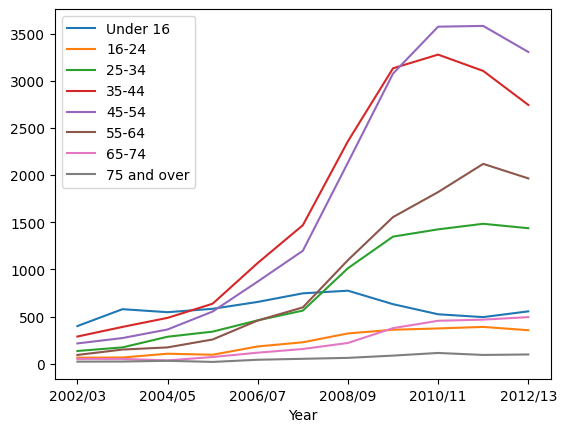

In [44]:
data_age_minus_total.plot()

<Axes: xlabel='Year'>

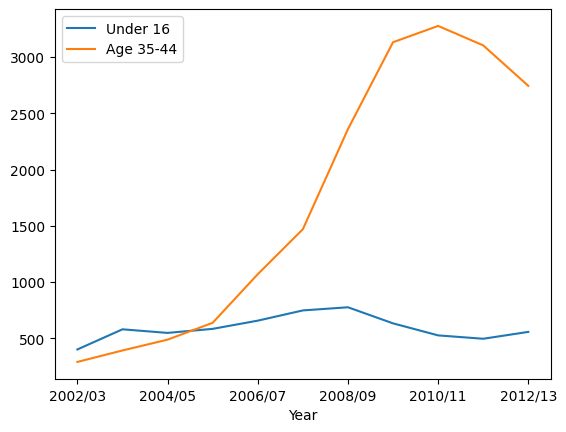

In [45]:
data_age["Under 16"].plot(label="Under 16", legend=True)
data_age["35-44"].plot(label="Age 35-44", legend=True)

### Timeseries

In [96]:
from datetime import datetime

In [97]:
date_rng = pd.date_range(start="2020-01-01", end="2020-08-01", freq="H")

In [98]:
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-07-31 15:00:00', '2020-07-31 16:00:00',
               '2020-07-31 17:00:00', '2020-07-31 18:00:00',
               '2020-07-31 19:00:00', '2020-07-31 20:00:00',
               '2020-07-31 21:00:00', '2020-07-31 22:00:00',
               '2020-07-31 23:00:00', '2020-08-01 00:00:00'],
              dtype='datetime64[ns]', length=5113, freq='H')

In [99]:
df = pd.DataFrame(date_rng, columns=["date"])

In [100]:
df.head()

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00


In [101]:
df["data"] = np.random.randint(0, 100, len(df))

In [102]:
df.head()

,date,data
0,2020-01-01 00:00:00,87
1,2020-01-01 01:00:00,61
2,2020-01-01 02:00:00,6
3,2020-01-01 03:00:00,65
4,2020-01-01 04:00:00,3


In [103]:
df.set_index("date", inplace=True)

In [104]:
df.head()

,data
date,
2020-01-01 00:00:00,87
2020-01-01 01:00:00,61
2020-01-01 02:00:00,6
2020-01-01 03:00:00,65
2020-01-01 04:00:00,3


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5113 entries, 2020-01-01 00:00:00 to 2020-08-01 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   data    5113 non-null   int32
dtypes: int32(1)
memory usage: 59.9 KB


In [106]:
date_rng[0]

Timestamp('2020-01-01 00:00:00')

In [107]:
str(date_rng[0])

'2020-01-01 00:00:00'

In [108]:
string_date_rng = [str(x) for x in date_rng]

In [109]:
string_date_rng[:5]

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00']

In [110]:
timestamp_date_rng = pd.to_datetime(string_date_rng, format="%Y-%m-%d %H:%M:%S")
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-07-31 15:00:00', '2020-07-31 16:00:00',
               '2020-07-31 17:00:00', '2020-07-31 18:00:00',
               '2020-07-31 19:00:00', '2020-07-31 20:00:00',
               '2020-07-31 21:00:00', '2020-07-31 22:00:00',
               '2020-07-31 23:00:00', '2020-08-01 00:00:00'],
              dtype='datetime64[ns]', length=5113, freq=None)

In [111]:
string_date_rng_2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']

In [112]:
pd.to_datetime(string_date_rng_2)

DatetimeIndex(['2020-06-01', '2020-06-02', '2020-06-03'], dtype='datetime64[ns]', freq=None)

In [113]:
string_date_rng_3 = ['01/06/70', '02/06/70', '03/06/70']
pd.to_datetime(string_date_rng_3, format="%d/%m/%y")

DatetimeIndex(['1970-06-01', '1970-06-02', '1970-06-03'], dtype='datetime64[ns]', freq=None)

YYYY - MM - DD HH:MM:SS:sssss

In [114]:
df.index.day

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       31, 31, 31, 31, 31, 31, 31, 31, 31,  1],
      dtype='int32', name='date', length=5113)

In [115]:
df.index.weekday

Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       ...
       4, 4, 4, 4, 4, 4, 4, 4, 4, 5],
      dtype='int32', name='date', length=5113)

In [116]:
df.index.year

Index([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
       ...
       2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
      dtype='int32', name='date', length=5113)

In [117]:
print(dir(df.index)[-20:])

['to_julian_date', 'to_list', 'to_numpy', 'to_period', 'to_pydatetime', 'to_series', 'transpose', 'tz', 'tz_convert', 'tz_localize', 'tzinfo', 'union', 'unique', 'unit', 'value_counts', 'values', 'view', 'weekday', 'where', 'year']


In [118]:
df[df.index.weekday == 1].head()

,data
date,
2020-01-07 00:00:00,26
2020-01-07 01:00:00,15
2020-01-07 02:00:00,69
2020-01-07 03:00:00,21
2020-01-07 04:00:00,63


In [119]:
df[df.index.hour > 8]

,data
date,
2020-01-01 09:00:00,85
2020-01-01 10:00:00,8
2020-01-01 11:00:00,89
2020-01-01 12:00:00,23
2020-01-01 13:00:00,8
...,...
2020-07-31 19:00:00,13
2020-07-31 20:00:00,74
2020-07-31 21:00:00,81


In [120]:
df['2020-06-01':'2020-07-01':24]

,data
date,
2020-06-01,37
2020-06-02,68
2020-06-03,28
2020-06-04,35
2020-06-05,55
2020-06-06,82
2020-06-07,46
2020-06-08,9
2020-06-09,45


In [121]:
df.resample("D").median()

,data
date,
2020-01-01,39.0
2020-01-02,53.0
2020-01-03,39.5
2020-01-04,50.5
2020-01-05,41.5
...,...
2020-07-28,57.0
2020-07-29,70.5
2020-07-30,61.5


In [122]:
df["rolling_sum"] = df.rolling(3).sum()

In [123]:
df.head()

,data,rolling_sum
date,,
2020-01-01 00:00:00,87,NaN
2020-01-01 01:00:00,61,NaN
2020-01-01 02:00:00,6,154.0
2020-01-01 03:00:00,65,132.0
2020-01-01 04:00:00,3,74.0


In [124]:
df["rolling_sum"].bfill(inplace=True)

In [125]:
df.head()

,data,rolling_sum
date,,
2020-01-01 00:00:00,87,154.0
2020-01-01 01:00:00,61,154.0
2020-01-01 02:00:00,6,154.0
2020-01-01 03:00:00,65,132.0
2020-01-01 04:00:00,3,74.0


### Dataset

In [127]:
url_ts = 'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv'
opsd_daily = pd.read_csv(url_ts)
opsd_daily.shape

(4383, 5)

In [129]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [131]:
opsd_daily.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [132]:
opsd_daily.nunique()

Date           4383
Consumption    4374
Wind           2913
Solar          2185
Wind+Solar     2185
dtype: int64

In [133]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [134]:
opsd_daily["Date"] = pd.to_datetime(opsd_daily["Date"])

In [135]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [136]:
opsd_daily.set_index("Date", inplace=True)

In [137]:
opsd_daily.tail()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [138]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [139]:
opsd_daily = pd.read_csv(url_ts, index_col="Date", parse_dates=True)

In [140]:
opsd_daily.tail()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [141]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [142]:
opsd_daily["Day"] = opsd_daily.index.day
opsd_daily["Weekday"] = opsd_daily.index.weekday
opsd_daily["Month"] = opsd_daily.index.month
opsd_daily["Year"] = opsd_daily.index.year

In [143]:
opsd_daily.tail()

,Consumption,Wind,Solar,Wind+Solar,Day,Weekday,Month,Year
Date,,,,,,,,
2017-12-27,1263.94091,394.507,16.530,411.037,27,2,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,28,3,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,29,4,12,2017
2017-12-30,1215.44897,721.247,7.467,728.714,30,5,12,2017
2017-12-31,1107.11488,721.176,19.980,741.156,31,6,12,2017


In [144]:
opsd_daily.loc["2010-01-01"]

Consumption    1057.372
Wind             48.709
Solar               NaN
Wind+Solar          NaN
Day               1.000
Weekday           4.000
Month             1.000
Year           2010.000
Name: 2010-01-01 00:00:00, dtype: float64

In [145]:
opsd_daily.loc["2010-01-01":"2010-01-20"]

,Consumption,Wind,Solar,Wind+Solar,Day,Weekday,Month,Year
Date,,,,,,,,
2010-01-01,1057.372,48.709,NaN,NaN,1,4,1,2010
2010-01-02,1161.042,24.628,NaN,NaN,2,5,1,2010
2010-01-03,1132.069,22.963,NaN,NaN,3,6,1,2010
2010-01-04,1346.250,59.318,NaN,NaN,4,0,1,2010
2010-01-05,1457.374,41.624,NaN,NaN,5,1,1,2010
2010-01-06,1434.055,14.132,NaN,NaN,6,2,1,2010
2010-01-07,1493.432,9.381,NaN,NaN,7,3,1,2010
2010-01-08,1489.440,105.563,NaN,NaN,8,4,1,2010
2010-01-09,1380.071,328.109,NaN,NaN,9,5,1,2010


In [146]:
opsd_daily.tail()

,Consumption,Wind,Solar,Wind+Solar,Day,Weekday,Month,Year
Date,,,,,,,,
2017-12-27,1263.94091,394.507,16.530,411.037,27,2,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,28,3,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,29,4,12,2017
2017-12-30,1215.44897,721.247,7.467,728.714,30,5,12,2017
2017-12-31,1107.11488,721.176,19.980,741.156,31,6,12,2017


<Axes: xlabel='Date'>

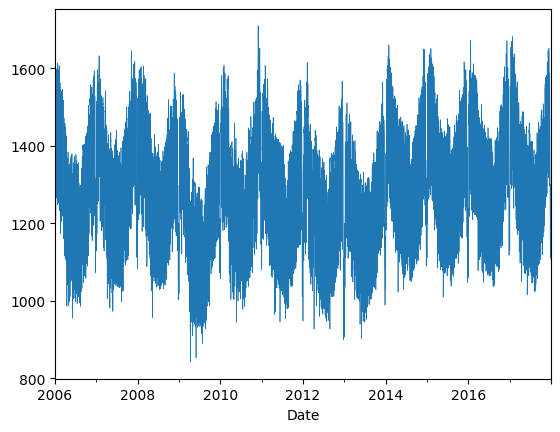

In [147]:
opsd_daily["Consumption"].plot(linewidth=0.5)

<Axes: xlabel='Date'>

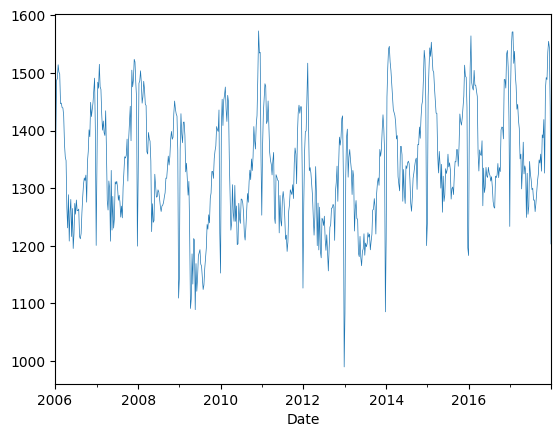

In [148]:
opsd_daily.resample("W").mean()["Consumption"].plot(linewidth=0.5)

<Axes: xlabel='Date'>

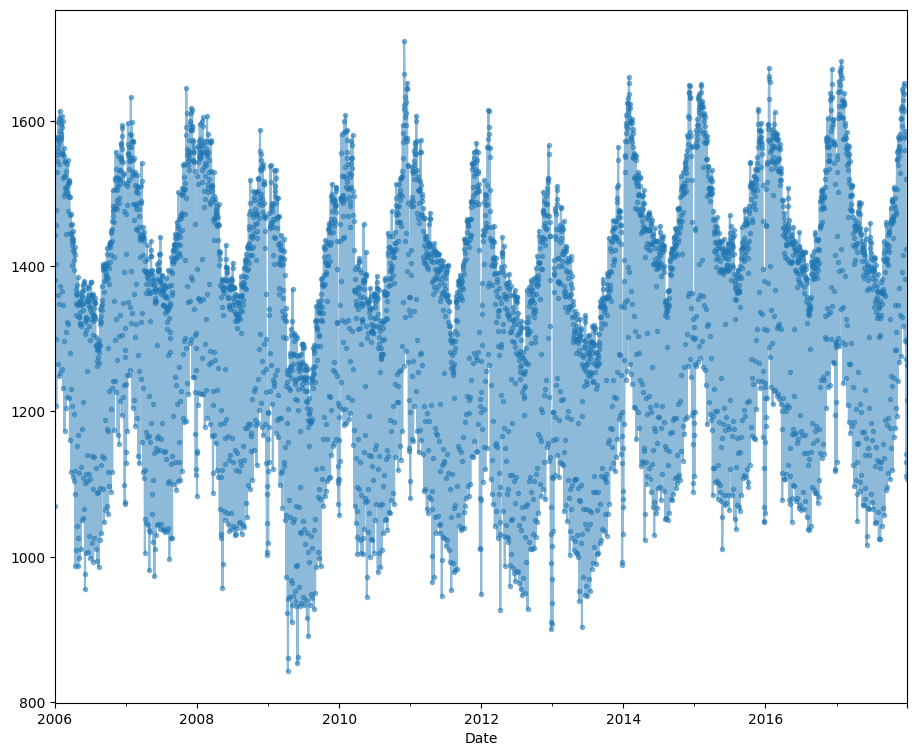

In [149]:
opsd_daily["Consumption"].plot(marker=".", alpha=0.5, linestyle=None, figsize=(11, 9))

<Axes: xlabel='Date'>

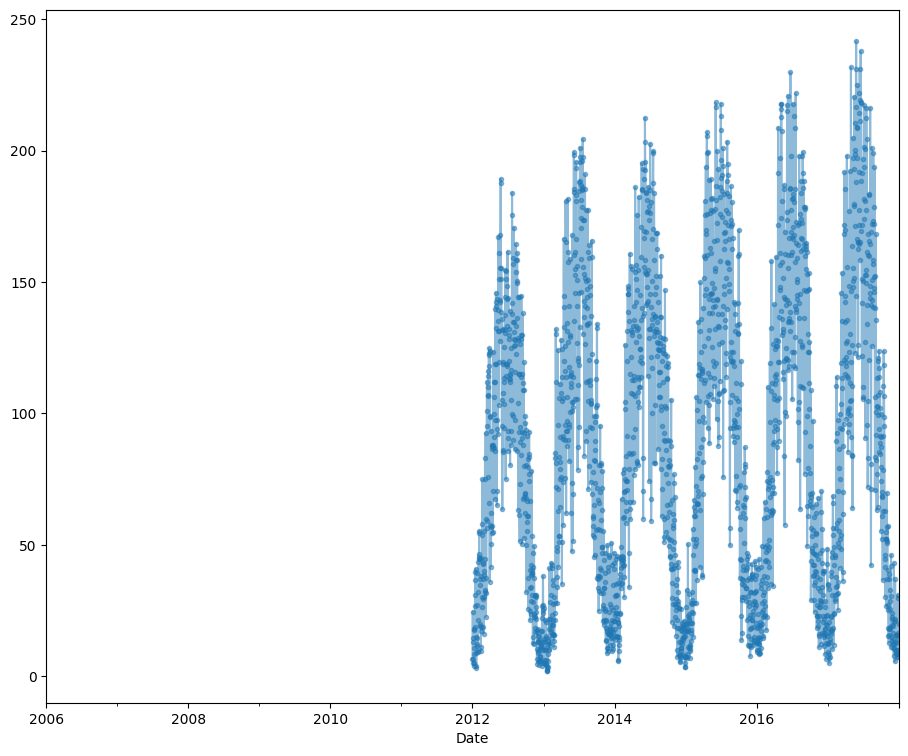

In [150]:
opsd_daily["Solar"].plot(marker=".", alpha=0.5, linestyle=None, figsize=(11, 9))

<Axes: xlabel='Date'>

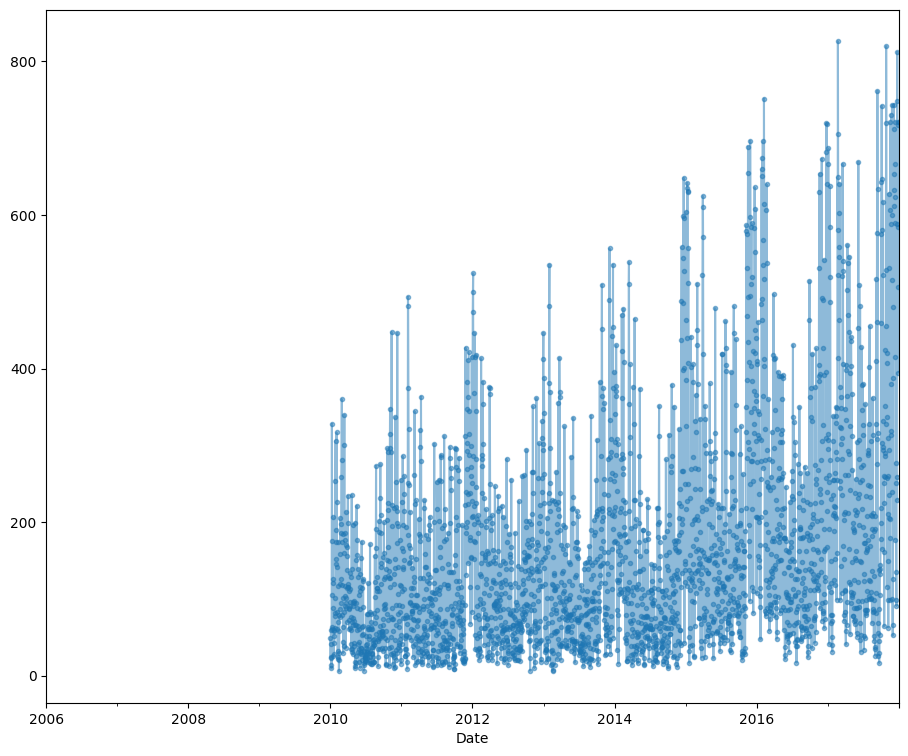

In [151]:
opsd_daily["Wind"].plot(marker=".", alpha=0.5, linestyle=None, figsize=(11, 9))

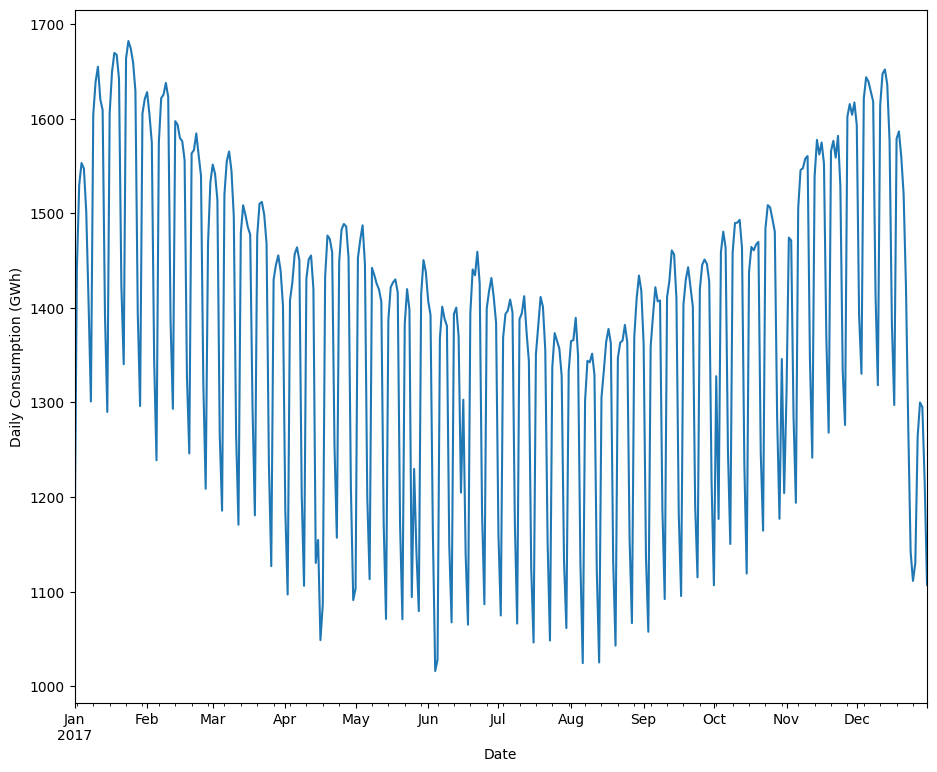

In [152]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11, 9))
ax.set_ylabel('Daily Consumption (GWh)');

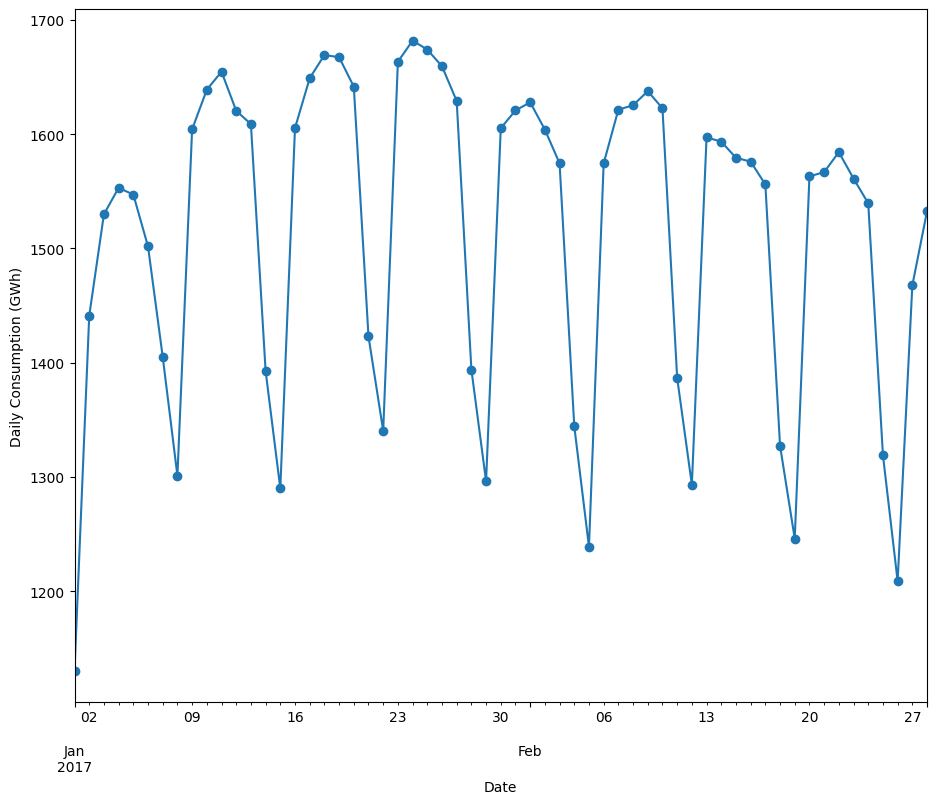

In [153]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-', figsize=(11, 9))
ax.set_ylabel('Daily Consumption (GWh)');

<Axes: title={'center': 'Consumption'}, xlabel='Month'>

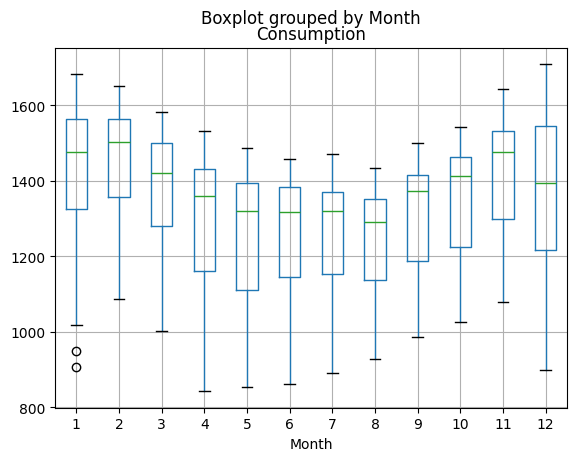

In [154]:
opsd_daily.boxplot(column=['Consumption'], by='Month')

<Axes: title={'center': 'Solar'}, xlabel='Month'>

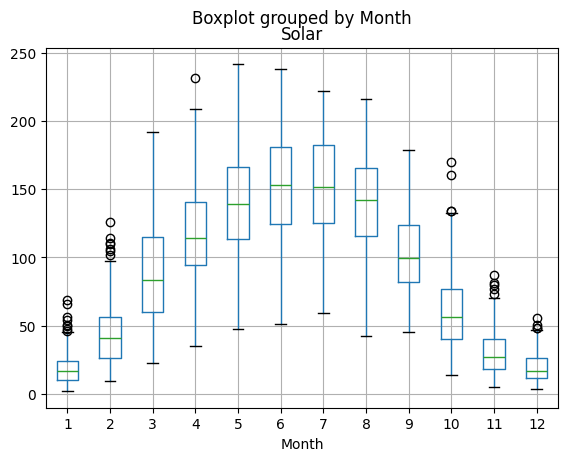

In [155]:
opsd_daily.boxplot(column=['Solar'], by='Month')

<Axes: title={'center': 'Wind'}, xlabel='Month'>

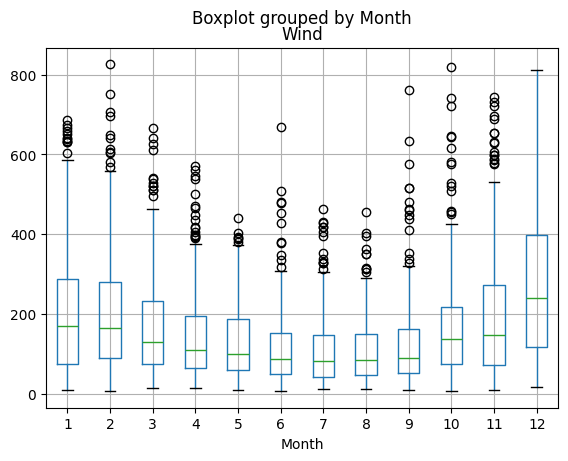

In [156]:
opsd_daily.boxplot(column=['Wind'], by='Month')

<Axes: title={'center': 'Consumption'}, xlabel='Weekday'>

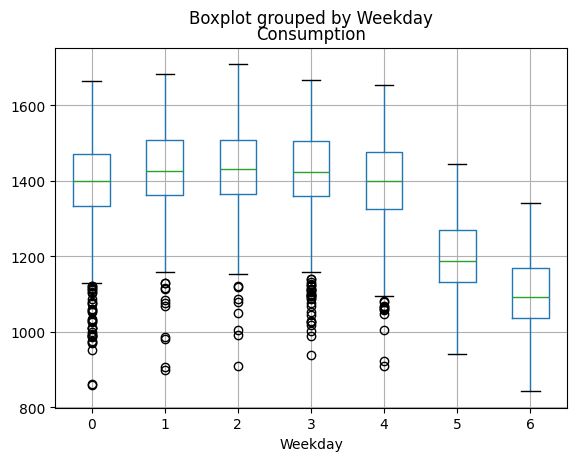

In [157]:
opsd_daily.boxplot(column=['Consumption'], by='Weekday')

In [158]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.tail(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-17,1543.856889,442.531857,18.143714,460.675571
2017-12-24,1440.342401,339.018429,9.895143,348.913571
2017-12-31,1203.265211,604.699143,19.240143,623.939286


In [159]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


In [160]:
4383/627

6.990430622009569

<Axes: xlabel='Date'>

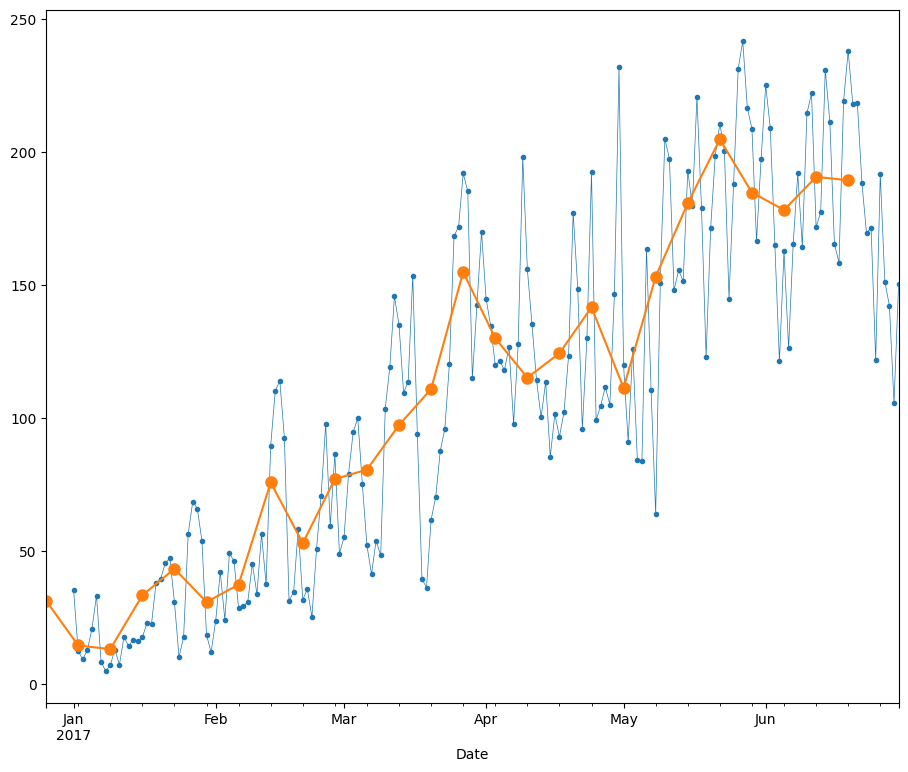

In [161]:
start, end = '2017-01', '2017-06'

opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='o', markersize=8, linestyle='-', figsize=(11, 9))